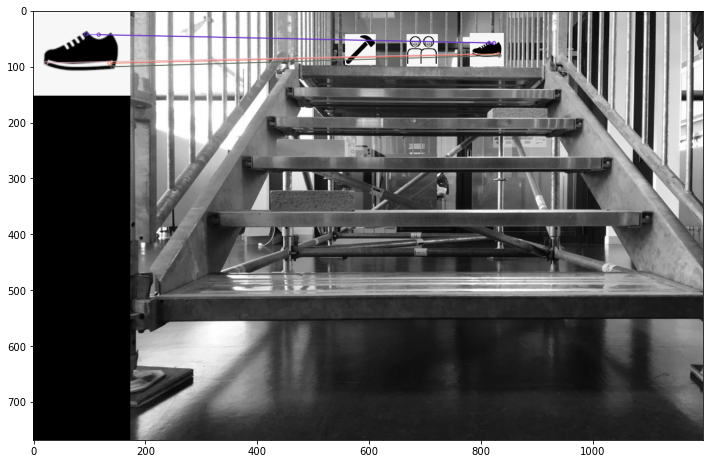

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    
treppe = cv2.imread('DATA/Treppe_mitPiktogramm.png', 0);
hammer = cv2.imread('DATA/Hammer.png', 0)
maske = cv2.imread('DATA/Maske.png', 0)
schuh = cv2.imread('DATA/Schuh.png')

#SIFT
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(schuh, None)
kp2, des2 = sift.detectAndCompute(treppe,None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
good = [] #leeres Array für gute Matches. Wobei kleinere Distance = bessere Übereinstimmung

for match1, match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])
        
sift_matches = cv2.drawMatchesKnn(schuh,kp1,treppe,kp2,good,None,flags=2)
display(sift_matches)
